## **Part 2 Visualizing Decision Boundaries**

This exercise uses the make_circles and make_moons datasets to understand decision boundaries for different classifiers. The scikit-learn is used for SVM and KNN.

In [1]:
import sklearn
from IPython import display
from sklearn.model_selection import train_test_split

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import validation_curve

## **Part A**
500 data points are created the "noise" parameter is 0.2 and the data is split 80-20 (train-test)

In [2]:
from sklearn.datasets import make_moons
from sklearn.datasets import make_circles

#Generate 500 data points with noise=0.2
X_moons, y_moons = make_moons(n_samples=500, shuffle=True, noise=0.2, random_state=1)
X_circles, y_circles = make_circles(n_samples=500, shuffle=True, noise=0.2, random_state=1)

#create training and testing sets 80/20 split (training/testing)
Xtrain_moon, Xtest_moon, ytrain_moon, ytest_moon = train_test_split(X_moons, y_moons, test_size=0.2, random_state=1)
Xtrain_circle, Xtest_circle, ytrain_circle, ytest_circle = train_test_split(X_circles, y_circles, test_size=0.2, random_state=1)

In [3]:
#view output sample
ytest_moon[1:10]

array([1, 1, 1, 1, 0, 0, 1, 1, 1], dtype=int64)

In [4]:
#view output sample
Xtrain_moon[1:10]

array([[ 1.12592382,  0.77154062],
       [ 0.23299505,  0.20037192],
       [ 0.98503787,  0.41500331],
       [ 0.94751365,  0.55518104],
       [-0.02019344,  0.60916149],
       [ 0.09858204, -0.58638603],
       [-0.03767929,  0.39457021],
       [ 0.12480458,  1.1680279 ],
       [ 1.70765957, -0.55076546]])

In [5]:
#view output sample
ytest_circle[1:10]

array([1, 1, 1, 1, 0, 0, 1, 1, 1], dtype=int64)

In [6]:
#view output sample
Xtrain_circle[1:10]

array([[ 9.73237856e-01,  1.05728485e+00],
       [ 1.03166626e+00, -2.34201628e-01],
       [ 9.18057971e-01,  6.16533414e-01],
       [ 5.37777755e-02,  6.95001563e-01],
       [ 7.79806564e-01,  1.09161491e-01],
       [-7.67094687e-01,  4.79095179e-01],
       [ 5.90533451e-01,  6.17817365e-01],
       [-8.81187981e-01,  1.93177895e-01],
       [-4.57795889e-04, -1.15483481e+00]])

## **Part B: Linear SVM**
Use 5-fold cross-validation to select the top 2 best values and 1 bad value for hyperparameter C

In [7]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from matplotlib.colors import ListedColormap
from sklearn.model_selection import cross_val_score

In [8]:
#use linear SVM kernel
#moon train
sv_moon_train = SVC(kernel='linear').fit(Xtrain_moon, ytrain_moon)

#circle train
sv_circle_train = SVC(kernel='linear').fit(Xtrain_circle, ytrain_circle)


Validation curve for moon data

param range: [1.e-05 1.e-03 1.e-01 1.e+01 1.e+03 1.e+05]
test scores mean: [0.52   0.52   0.86   0.88   0.8775 0.875 ]


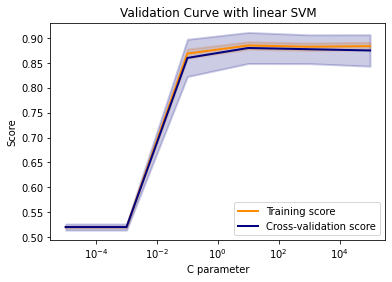

In [36]:
# select from the range
param_range = np.logspace(-5,5, 6)

print("param range:", param_range)
#test for values of C and set cross validation to 5
train_scores, test_scores = validation_curve(
   sv_moon_train,Xtrain_moon, ytrain_moon, param_name="C", param_range=param_range,
    scoring="accuracy", n_jobs=1, cv = 5)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

print("test scores mean:", test_scores_mean)

# Plot CV error as a function of C
plt.title("Validation Curve with linear SVM")
plt.xlabel("C parameter")
plt.ylabel("Score")
lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

Get best and second best C value for moon data

In [37]:
#Best C value for moon data
C_best_moon = param_range[np.argsort(test_scores_mean)[-1]]

print("The best hyperparameter: ", C_best_moon)
dist_moon = SVC(kernel='linear', C = C_best_moon, probability = True)
dist_moon.fit(Xtrain_moon, ytrain_moon)
acc_train_moon = dist_moon.score(Xtrain_moon, ytrain_moon)
acc_test_moon = dist_moon.score(Xtest_moon, ytest_moon)
print('Training accuracy for moon data:', acc_train_moon)
print('Test accuracy for moon data:', acc_test_moon)

The best hyperparameter:  10.0
Training accuracy for moon data: 0.8875
Test accuracy for moon data: 0.87


In [38]:
#Second est C value for moon data
C_best2_moon = param_range[np.argsort(test_scores_mean)[-2]]

print("The second best hyperparameter: ", C_best2_moon)
dist_moon2 = SVC(kernel='linear', C = C_best2_moon, probability = True)
dist_moon2.fit(Xtrain_moon, ytrain_moon)
acc_train_moon2 = dist_moon2.score(Xtrain_moon, ytrain_moon)
acc_test_moon2 = dist_moon2.score(Xtest_moon, ytest_moon)
print('Training accuracy for moon data:', acc_train_moon2)
print('Test accuracy for moon data:', acc_test_moon2)

The second best hyperparameter:  1000.0
Training accuracy for moon data: 0.8875
Test accuracy for moon data: 0.87


Choose a bad C value for moon data

In [39]:
print("Bad hyperparameter: ", 0.001)
dist_moon_bad = SVC(kernel='linear', C = 0.001, probability = True)
dist_moon_bad.fit(Xtrain_moon, ytrain_moon)
acc_train_moon_bad = dist_moon_bad.score(Xtrain_moon, ytrain_moon)
acc_test_moon_bad = dist_moon_bad.score(Xtest_moon, ytest_moon)
print('Training accuracy for moon data:', acc_train_moon_bad)
print('Test accuracy for moon data:', acc_test_moon_bad)

Bad hyperparameter:  0.001
Training accuracy for moon data: 0.52
Test accuracy for moon data: 0.42


Validation curve for circle data

param range: [1.e-05 1.e-03 1.e-01 1.e+01 1.e+03 1.e+05]
test scores mean: [0.52   0.52   0.4875 0.485  0.485  0.485 ]


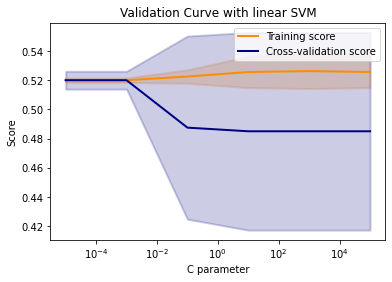

In [40]:
# select from the range
param_range = np.logspace(-5,5, 6)

print("param range:", param_range)

train_scores, test_scores = validation_curve(
   sv_circle_train,Xtrain_circle, ytrain_circle, param_name="C", param_range=param_range,
    scoring="accuracy", n_jobs=1, cv = 5)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

print("test scores mean:", test_scores_mean)

# Plot CV error as a function of C
plt.title("Validation Curve with linear SVM")
plt.xlabel("C parameter")
plt.ylabel("Score")
lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

Get best and second best C value for circle data

In [41]:
#Best C value for circle data
C_best_circle = param_range[np.argsort(test_scores_mean)[-1]]
print("The best hyperparameter: ", C_best_circle)
dist_circle = SVC(kernel='linear', C = C_best_circle, probability = True)
dist_circle.fit(Xtrain_circle, ytrain_circle)
acc_train_circle = dist_circle.score(Xtrain_circle, ytrain_circle)
acc_test_circle = dist_circle.score(Xtest_moon, ytest_circle)
print('Training accuracy:', acc_train_circle)
print('Test accuracy:', acc_test_circle)

The best hyperparameter:  0.001
Training accuracy: 0.52
Test accuracy: 0.42


In [42]:
#Second Best C value for circle data
C_best_circle2 = param_range[np.argsort(test_scores_mean)[-2]]
print("The second best hyperparameter: ", C_best_circle2)
dist_circle = SVC(kernel='linear', C = C_best_circle2, probability = True)
dist_circle.fit(Xtrain_circle, ytrain_circle)
acc_train_circle = dist_circle.score(Xtrain_circle, ytrain_circle)
acc_test_circle = dist_circle.score(Xtest_moon, ytest_circle)
print('Training accuracy:', acc_train_circle)
print('Test accuracy:', acc_test_circle)

The second best hyperparameter:  1e-05
Training accuracy: 0.52
Test accuracy: 0.42


Choose a bad C value for circle data

In [43]:
print("Bad hyperparameter: ", 1)
dist_circle_bad = SVC(kernel='linear', C = 1, probability = True)
dist_circle_bad.fit(Xtrain_circle, ytrain_circle)
acc_train_circle_bad = dist_circle_bad.score(Xtrain_circle, ytrain_circle)
acc_test_circle_bad = dist_circle_bad.score(Xtest_moon, ytest_circle)
print('Training accuracy:', acc_train_circle_bad)
print('Test accuracy:', acc_test_circle_bad)

Bad hyperparameter:  1
Training accuracy: 0.52
Test accuracy: 0.42


Code for plotting SVM model (from SVM_Decision_Boundary demo)

In [33]:
def plot_decision_boundary(model, title, x_train, x_test, y_train):
    h = 0.01
    cmap_light = ListedColormap(['#FFAAAA',  '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000',  '#0000FF'])

    x_min, x_max = x_train[:,0].min(), x_train[:,0].max() 
    y_min, y_max = x_train[:,1].min(), x_train[:,1].max()

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light, shading='auto')

    # Also plot the training points
    plt.scatter(x_train[:,0], x_train[:,1], c=y_train, cmap=cmap_bold)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(title)

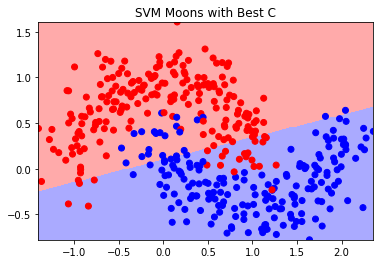

In [44]:
#Plot SVM Moons with best C
plot_decision_boundary(dist_moon, 'SVM Moons with Best C', Xtrain_moon, Xtest_moon, ytrain_moon)

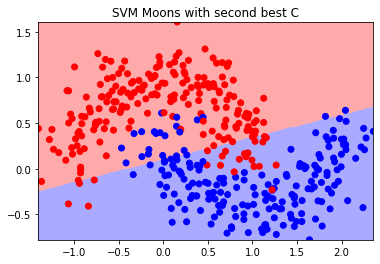

In [45]:
#Plot SVM Moons with best C
plot_decision_boundary(dist_moon2, 'SVM Moons with second best C', Xtrain_moon, Xtest_moon, ytrain_moon)

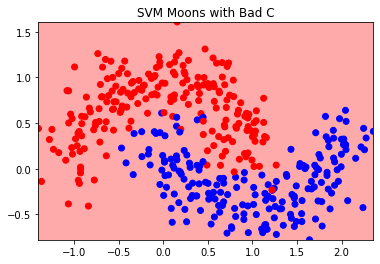

In [20]:
#Plot SVM Moons with bad C
plot_decision_boundary(dist_moon_bad, 'SVM Moons with Bad C', Xtrain_moon, Xtest_moon, ytrain_moon)

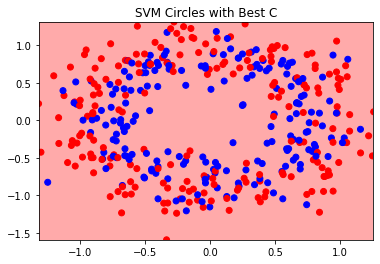

In [46]:
#Plot SVM Moons with best C
plot_decision_boundary(dist_circle, 'SVM Circles with Best C', Xtrain_circle, Xtest_circle, ytrain_circle)

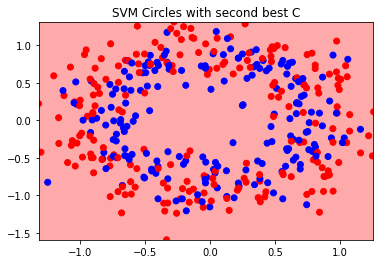

In [47]:
#Plot SVM Circles with second best C
plot_decision_boundary(dist_circle, 'SVM Circles with second best C', Xtrain_circle, Xtest_circle, ytrain_circle)

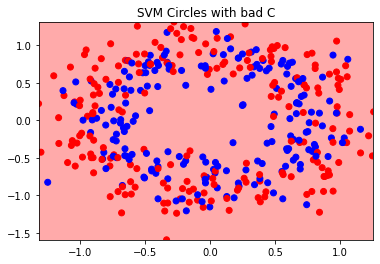

In [22]:
#Plot SVM Circles with bad C
plot_decision_boundary(dist_circle_bad, 'SVM Circles with bad C', Xtrain_circle, Xtest_circle, ytrain_circle)

## **Interpret Results for Part B**

Based on the plotted heat maps and the accuracy calculations, we can see that linear SVM works pretty well for the moon dataset and did not work well for the circle dataset. 

Moons dataset:
The best C value was 10 and the SVM model accuracy with this hyperparameter is 88.75% (training) 87% (testing). We have chosen this parameter for C because it offers the highest validation score mean before the graph plateaus (i.e. test score mean improves very little/no improvements as C gets larger than 10). We can see that the accuracy is pretty high on both the training and testing data which means that the model fits the data pretty well. As expected, we see a slightly higher accuracy on the training data than the testing data due to the model being trained on the training data so more of those random effects are captured. Similarly, the second best C value produced very similar results but with slightly lower accuracy.
To test the bad value for C, we chose 0.001 based on the validation score mean from the validation curve. The accuracy much lower with only 52% (training) and 42% (testing). Since our penalty parameter is very small there is less emphasis on misclassifying points but allows for a large margin, this is causing both the training and test accuracy to be very low.

Circle dataset:
The linear SVM is NOT a good model for classifying the circle dataset. We can see that the best C value, second best value of C and the bad C value are basically the same in their accuracy levels around 42-52% with both the testing and training data. The validation curve also shows that there are no improvements in validation score mean with the changes in C at all. To improve the SVM model for this dataset, we should explore nonlinear kernels that fit better to the data.


## **Part C: SVM RBF Kernel**
5-fold cross-validation with default C = 1

In [48]:
#use RBF SVM kernel with 5 fold cross validation
#moon train
rbf_moon_train = SVC(kernel='rbf',C=1).fit(Xtrain_moon, ytrain_moon)

#circle train
rbf_circle_train = SVC(kernel='rbf',C=1).fit(Xtrain_circle, ytrain_circle)


param range: [1.e-05 1.e-03 1.e-01 1.e+01 1.e+03 1.e+05]
test scores mean: [0.52   0.54   0.8775 0.975  0.705  0.5175]


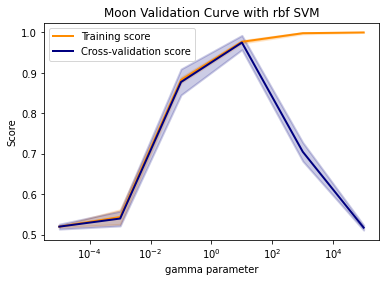

In [49]:
# select from the range
param_range = np.logspace(-5,5, 6)

print("param range:", param_range)

train_scores_rbf_moon, test_scores_rbf_moon = validation_curve(rbf_moon_train,Xtrain_moon, ytrain_moon, param_name="gamma", param_range=param_range,
    scoring="accuracy", n_jobs=1, cv = 5)
train_scores_rbf_moon_mean = np.mean(train_scores_rbf_moon, axis=1)
train_scores_rbf_moon_std = np.std(train_scores_rbf_moon, axis=1)
test_scores_rbf_moon_mean = np.mean(test_scores_rbf_moon, axis=1)
test_scores_rbf_moon_std = np.std(test_scores_rbf_moon, axis=1)

print("test scores mean:", test_scores_rbf_moon_mean)

# Plot CV error as a function of gamma
plt.title("Moon Validation Curve with rbf SVM")
plt.xlabel("gamma parameter")
plt.ylabel("Score")
lw = 2
plt.semilogx(param_range, train_scores_rbf_moon_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_rbf_moon_mean - train_scores_rbf_moon_std,
                 train_scores_rbf_moon_mean + train_scores_rbf_moon_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_rbf_moon_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_rbf_moon_mean - test_scores_rbf_moon_std,
                 test_scores_rbf_moon_mean + test_scores_rbf_moon_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

param range: [1.e-05 1.e-03 1.e-01 1.e+01 1.e+03 1.e+05]
test scores mean: [0.52   0.52   0.505  0.6575 0.565  0.5225]


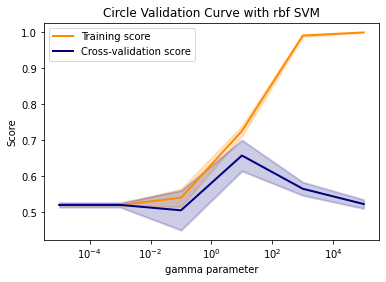

In [52]:
# select from the range
param_range = np.logspace(-5,5, 6)

print("param range:", param_range)

train_scores_rbf_circle, test_scores_rbf_circle = validation_curve(rbf_circle_train,Xtrain_circle, ytrain_circle, param_name="gamma", param_range=param_range,
    scoring="accuracy", n_jobs=1, cv = 5)
train_scores_rbf_circle_mean = np.mean(train_scores_rbf_circle, axis=1)
train_scores_rbf_circle_std = np.std(train_scores_rbf_circle, axis=1)
test_scores_rbf_circle_mean = np.mean(test_scores_rbf_circle, axis=1)
test_scores_rbf_circle_std = np.std(test_scores_rbf_circle, axis=1)

print("test scores mean:", test_scores_rbf_circle_mean)

# Plot CV error as a function of gamma
plt.title("Circle Validation Curve with rbf SVM")
plt.xlabel("gamma parameter")
plt.ylabel("Score")
lw = 2
plt.semilogx(param_range, train_scores_rbf_circle_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_rbf_circle_mean - train_scores_rbf_circle_std,
                 train_scores_rbf_circle_mean + train_scores_rbf_circle_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_rbf_circle_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_rbf_circle_mean - test_scores_rbf_circle_std,
                 test_scores_rbf_circle_mean + test_scores_rbf_circle_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

In [51]:
gamma_best1 = param_range[np.argsort(test_scores_rbf_moon_mean)[-1]]
print("The best gamma hyperparameter: ", gamma_best1)
dist_rbf_moon = SVC(kernel='rbf', gamma = gamma_best1)
dist_rbf_moon.fit(Xtrain_moon, ytrain_moon)
acc_train_rbf_moon = dist_rbf_moon.score(Xtrain_moon, ytrain_moon)
acc_test_rbf_moon = dist_rbf_moon.score(Xtest_moon, ytest_moon)
print('Training accuracy:', acc_train_rbf_moon)
print('Test accuracy:', acc_test_rbf_moon)

The best gamma hyperparameter:  10.0
Training accuracy: 0.9775
Test accuracy: 0.96


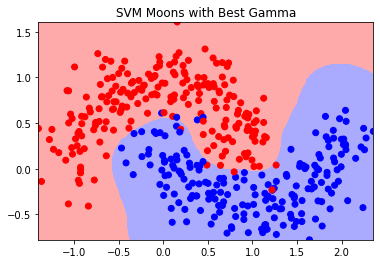

In [53]:
#Plot SVM Moons with best gamma
plot_decision_boundary(dist_rbf_moon, 'SVM Moons with Best Gamma', Xtrain_moon, Xtest_moon, ytrain_moon)

In [54]:
gamma_best1 = param_range[np.argsort(test_scores_rbf_moon_mean)[-2]]
print("The second best gamma hyperparameter: ", gamma_best1)
dist_rbf_moon = SVC(kernel='rbf', gamma = gamma_best1)
dist_rbf_moon.fit(Xtrain_moon, ytrain_moon)
acc_train_rbf_moon = dist_rbf_moon.score(Xtrain_moon, ytrain_moon)
acc_test_rbf_moon = dist_rbf_moon.score(Xtest_moon, ytest_moon)
print('Training accuracy:', acc_train_rbf_moon)
print('Test accuracy:', acc_test_rbf_moon)

The second best gamma hyperparameter:  0.1
Training accuracy: 0.89
Test accuracy: 0.89


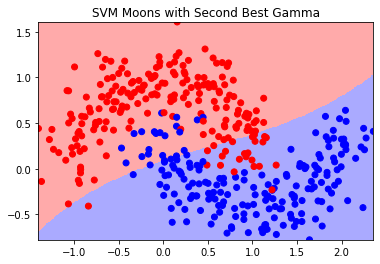

In [55]:
#Plot SVM Moons with second best gamma
plot_decision_boundary(dist_rbf_moon, 'SVM Moons with Second Best Gamma', Xtrain_moon, Xtest_moon, ytrain_moon)

In [56]:
print("The bad gamma hyperparameter: ", 0.001)
dist_rbf_moon = SVC(kernel='rbf', gamma = 0.001, C = 1)
dist_rbf_moon.fit(Xtrain_moon, ytrain_moon)
acc_train_rbf_moon = dist_rbf_moon.score(Xtrain_moon, ytrain_moon)
acc_test_rbf_moon = dist_rbf_moon.score(Xtest_moon, ytest_moon)
print('Training accuracy:', acc_train_rbf_moon)
print('Test accuracy:', acc_test_rbf_moon)

The bad gamma hyperparameter:  0.001
Training accuracy: 0.74
Test accuracy: 0.71


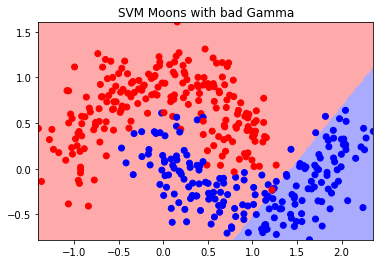

In [57]:
#Plot SVM Moons with bad gamma
plot_decision_boundary(dist_rbf_moon, 'SVM Moons with bad Gamma', Xtrain_moon, Xtest_moon, ytrain_moon)

In [58]:
gamma_best_circle = param_range[np.argsort(test_scores_rbf_circle_mean)[-1]]
print("The best gamma hyperparameter: ", gamma_best_circle)
dist_rbf_circle = SVC(kernel='rbf', gamma = gamma_best_circle, C = 1)
dist_rbf_circle.fit(Xtrain_circle, ytrain_circle)
acc_train_rbf_circle = dist_rbf_circle.score(Xtrain_circle, ytrain_circle)
acc_test_rbf_circle = dist_rbf_circle.score(Xtest_circle, ytest_circle)
print('Training accuracy:', acc_train_rbf_circle)
print('Test accuracy:', acc_test_rbf_circle)

The best gamma hyperparameter:  10.0
Training accuracy: 0.7175
Test accuracy: 0.73


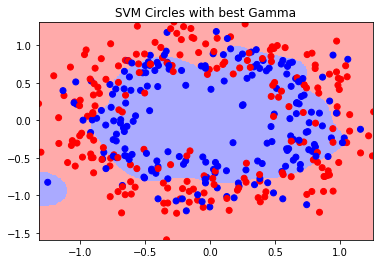

In [59]:
#Plot SVM circles with best gamma
plot_decision_boundary(dist_rbf_circle, 'SVM Circles with best Gamma', Xtrain_circle, Xtest_circle, ytrain_circle)

In [62]:
gamma_best_circle = param_range[np.argsort(test_scores_rbf_circle_mean)[-2]]
print("The second best gamma hyperparameter: ", gamma_best_circle)
dist_rbf_circle = SVC(kernel='rbf', gamma = gamma_best_circle, C = 1)
dist_rbf_circle.fit(Xtrain_circle, ytrain_circle)
acc_train_rbf_circle = dist_rbf_circle.score(Xtrain_circle, ytrain_circle)
acc_test_rbf_circle = dist_rbf_circle.score(Xtest_circle, ytest_circle)
print('Training accuracy:', acc_train_rbf_circle)
print('Test accuracy:', acc_test_rbf_circle)

The second best gamma hyperparameter:  1000.0
Training accuracy: 0.99
Test accuracy: 0.59


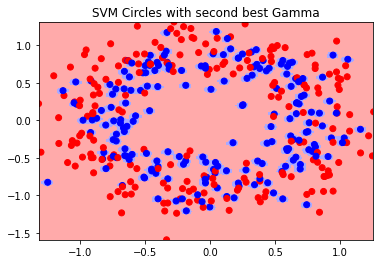

In [64]:
#Plot SVM circles with second best gamma
plot_decision_boundary(dist_rbf_circle, 'SVM Circles with second best Gamma', Xtrain_circle, Xtest_circle, ytrain_circle)

In [60]:
print("The bad gamma hyperparameter: ", 0.01)
dist_rbf_circle_bad = SVC(kernel='rbf', gamma = 0.01, C = 1)
dist_rbf_circle_bad.fit(Xtrain_circle, ytrain_circle)
acc_train_rbf_circle_bad = dist_rbf_circle_bad.score(Xtrain_circle, ytrain_circle)
acc_test_rbf_circle_bad = dist_rbf_circle_bad.score(Xtest_circle, ytest_circle)
print('Training accuracy:', acc_train_rbf_circle_bad)
print('Test accuracy:', acc_test_rbf_circle_bad)

The bad gamma hyperparameter:  0.01
Training accuracy: 0.52
Test accuracy: 0.42


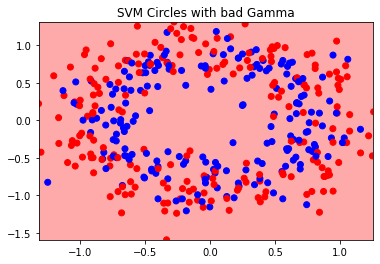

In [61]:
#Plot SVM circles with bad gamma
plot_decision_boundary(dist_rbf_circle_bad, 'SVM Circles with bad Gamma', Xtrain_circle, Xtest_circle, ytrain_circle)

Result interpretation: 
In comparison to linear SVM the RBF SVM models performed much better on both datasets,
Moons dataset:
Looking at the validation curve, the best gamma parameter is 10 since the cross validation score drops significantly past 10. The accuracy is 97.75% for training and 96% for testing data - very high. The heat map with the best gamma parameter has a classifier that does not look smooth - this is concerning because it is a sign of overfitting. The second best gamma is 0.1. The accuracy is much lower than the best gamma but the classify is much smoother showing that there is less overfitting but not a very good match for the data.
Finally, the bad gamma parameter is very low which makes the model very constrained and has a hard time capturing the shape/complexity of the data.
Circle dataset:
RBF does a much better job with the circle data compared to the linear SVM. The best gamma is 10 with around 70% accuracy. The second best gamma (1000) is very interesting since it's training accuracy is 99% but test accuracy is only 59% - a clear sign of overfitting. Finally the bad parameter is 0.01 which has the same issue as the one in the moon dataset where gamma is small and cannot capture the complexity of the data.

# **Part D: Polynomial Kernel**
Default values for C (penalty parameter) and &#120574; (scaling parameter). Try models for degrees 2 and 3 and different values for the offset parameter.

In [65]:
#use polynomial SVM kernel with 5 fold cross validation
#moon train for degrees 2 and 3
poly_moon_train_2 = SVC(kernel='poly',degree=2).fit(Xtrain_moon, ytrain_moon)
poly_moon_train_3 = SVC(kernel='poly',degree=3).fit(Xtrain_moon, ytrain_moon)

#circle train for degrees 2 and 3
#
poly_circle_train_2 = SVC(kernel='poly',degree=2).fit(Xtrain_circle, ytrain_circle)
poly_circle_train_3 = SVC(kernel='poly',degree=3).fit(Xtrain_circle, ytrain_circle)

param range: [1.e-05 1.e-03 1.e-01 1.e+01 1.e+03 1.e+05]
test scores mean: [0.79   0.785  0.8725 0.8775 0.8775 0.875 ]


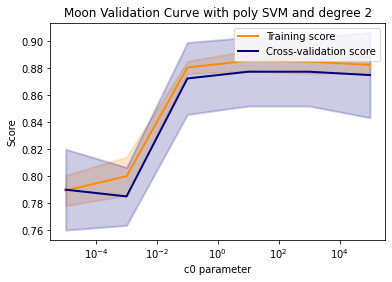

In [70]:
# select from the range
param_range = np.logspace(-5,5, 6)

print("param range:", param_range)

train_scores_poly2_moon, test_scores_poly2_moon = validation_curve(poly_moon_train_2,Xtrain_moon, ytrain_moon, param_name="coef0", param_range=param_range,
    scoring="accuracy", n_jobs=1, cv = 5)
train_scores_poly2_moon_mean = np.mean(train_scores_poly2_moon, axis=1)
train_scores_poly2_moon_std = np.std(train_scores_poly2_moon, axis=1)
test_scores_poly2_moon_mean = np.mean(test_scores_poly2_moon, axis=1)
test_scores_poly2_moon_std = np.std(test_scores_poly2_moon, axis=1)

print("test scores mean:", test_scores_poly2_moon_mean)

# Plot CV error as a function of gamma
plt.title("Moon Validation Curve with poly SVM and degree 2")
plt.xlabel("c0 parameter")
plt.ylabel("Score")
lw = 2
plt.semilogx(param_range, train_scores_poly2_moon_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_poly2_moon_mean - train_scores_poly2_moon_std,
                 train_scores_poly2_moon_mean + train_scores_poly2_moon_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_poly2_moon_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_poly2_moon_mean - test_scores_poly2_moon_std,
                 test_scores_poly2_moon_mean + test_scores_poly2_moon_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

param range: [1.e-04 1.e-02 1.e+00 1.e+02 1.e+04]
test scores mean: [0.8975 0.9075 0.96   0.96   0.8725]


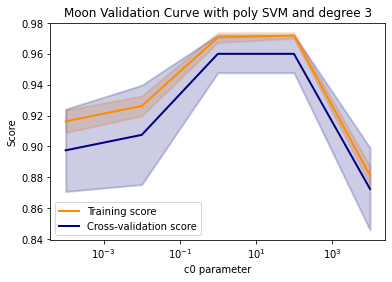

In [71]:
# select from the range
param_range = np.logspace(-4,4, 5)

print("param range:", param_range)

train_scores_poly3_moon, test_scores_poly3_moon = validation_curve(poly_moon_train_3,Xtrain_moon, ytrain_moon, param_name="coef0", param_range=param_range,
    scoring="accuracy", n_jobs=8, cv = 5)
train_scores_poly3_moon_mean = np.mean(train_scores_poly3_moon, axis=1)
train_scores_poly3_moon_std = np.std(train_scores_poly3_moon, axis=1)
test_scores_poly3_moon_mean = np.mean(test_scores_poly3_moon, axis=1)
test_scores_poly3_moon_std = np.std(test_scores_poly3_moon, axis=1)

print("test scores mean:", test_scores_poly3_moon_mean)

# Plot CV error as a function of gamma
plt.title("Moon Validation Curve with poly SVM and degree 3")
plt.xlabel("c0 parameter")
plt.ylabel("Score")
lw = 2
plt.semilogx(param_range, train_scores_poly3_moon_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_poly3_moon_mean - train_scores_poly3_moon_std,
                 train_scores_poly3_moon_mean + train_scores_poly3_moon_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_poly3_moon_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_poly3_moon_mean - test_scores_poly3_moon_std,
                 test_scores_poly3_moon_mean + test_scores_poly3_moon_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

param range: [1.e-05 1.e-03 1.e-01 1.e+01 1.e+03 1.e+05]
test scores mean: [0.68   0.6825 0.68   0.6825 0.67   0.45  ]


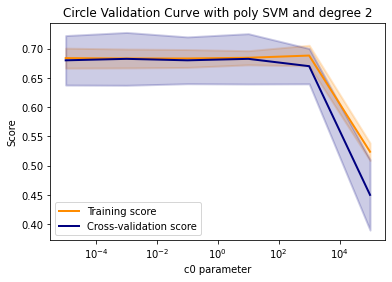

In [72]:
# select from the range
param_range = np.logspace(-5,5, 6)

print("param range:", param_range)

train_scores_poly2_circle, test_scores_poly2_circle = validation_curve(poly_circle_train_2,Xtrain_circle, ytrain_circle, param_name="coef0", param_range=param_range,
    scoring="accuracy", n_jobs=1, cv = 5)
train_scores_poly2_circle_mean = np.mean(train_scores_poly2_circle, axis=1)
train_scores_poly2_circle_std = np.std(train_scores_poly2_circle, axis=1)
test_scores_poly2_circle_mean = np.mean(test_scores_poly2_circle, axis=1)
test_scores_poly2_circle_std = np.std(test_scores_poly2_circle, axis=1)

print("test scores mean:", test_scores_poly2_circle_mean)

# Plot CV error as a function of gamma
plt.title("Circle Validation Curve with poly SVM and degree 2")
plt.xlabel("c0 parameter")
plt.ylabel("Score")
lw = 2
plt.semilogx(param_range, train_scores_poly2_circle_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_poly2_circle_mean - train_scores_poly2_circle_std,
                 train_scores_poly2_circle_mean + train_scores_poly2_circle_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_poly2_circle_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_poly2_circle_mean - test_scores_poly2_circle_std,
                 test_scores_poly2_circle_mean + test_scores_poly2_circle_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

param range: [1.e-04 1.e-02 1.e+00 1.e+02 1.e+04]
test scores mean: [0.485  0.53   0.6875 0.6725 0.645 ]


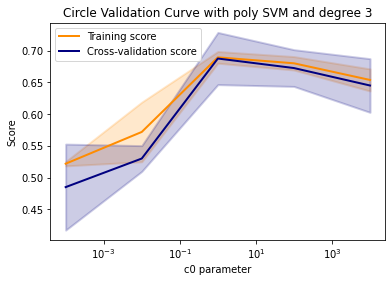

In [74]:
# select from the range
param_range = np.logspace(-4,4, 5)

print("param range:", param_range)

train_scores_poly3_circle, test_scores_poly3_circle = validation_curve(poly_circle_train_3,Xtrain_circle, ytrain_circle, param_name="coef0", param_range=param_range,
    scoring="accuracy", n_jobs=8, cv = 5)
train_scores_poly3_circle_mean = np.mean(train_scores_poly3_circle, axis=1)
train_scores_poly3_circle_std = np.std(train_scores_poly3_circle, axis=1)
test_scores_poly3_circle_mean = np.mean(test_scores_poly3_circle, axis=1)
test_scores_poly3_circle_std = np.std(test_scores_poly3_circle, axis=1)

print("test scores mean:", test_scores_poly3_circle_mean)

# Plot CV error as a function of gamma
plt.title("Circle Validation Curve with poly SVM and degree 3")
plt.xlabel("c0 parameter")
plt.ylabel("Score")
lw = 2
plt.semilogx(param_range, train_scores_poly3_circle_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_poly3_circle_mean - train_scores_poly3_circle_std,
                 train_scores_poly3_circle_mean + train_scores_poly3_circle_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_poly3_circle_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_poly3_circle_mean - test_scores_poly3_circle_std,
                 test_scores_poly3_circle_mean + test_scores_poly3_circle_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

In [85]:
coeff0_poly2_moon = param_range[np.argsort(test_scores_poly2_moon_mean)[-1]]
print("The second best coeff0: ", coeff0_poly2_moon)
dist_poly2_moon = SVC(kernel='poly', coef0 = coeff0_poly2_moon, degree=2)
dist_poly2_moon.fit(Xtrain_moon, ytrain_moon)
acc_train_poly2_moon = dist_poly2_moon.score(Xtrain_moon, ytrain_moon)
acc_test_poly2_moon = dist_poly2_moon.score(Xtest_moon, ytest_moon)
print('Training accuracy:', acc_train_poly2_moon)
print('Test accuracy:', acc_test_poly2_moon)

The second best coeff0:  10000.0
Training accuracy: 0.8775
Test accuracy: 0.85


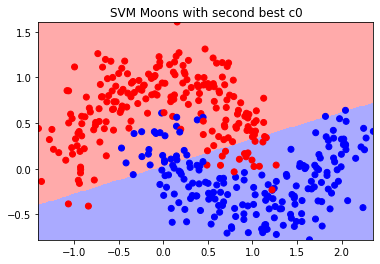

In [86]:
#Plot SVM moons with best c0 and degree=2
plot_decision_boundary(dist_poly2_moon, 'SVM Moons with second best c0', Xtrain_moon, Xtest_moon, ytrain_moon)

In [84]:
coeff0_poly2_moon = param_range[np.argsort(test_scores_poly2_moon_mean)[-2]]
print("The best coeff0: ", coeff0_poly2_moon)
dist_poly2_moon = SVC(kernel='poly', coef0 = coeff0_poly2_moon, degree=2)
dist_poly2_moon.fit(Xtrain_moon, ytrain_moon)
acc_train_poly2_moon = dist_poly2_moon.score(Xtrain_moon, ytrain_moon)
acc_test_poly2_moon = dist_poly2_moon.score(Xtest_moon, ytest_moon)
print('Training accuracy:', acc_train_poly2_moon)
print('Test accuracy:', acc_test_poly2_moon)

The best coeff0:  100.0
Training accuracy: 0.8825
Test accuracy: 0.86


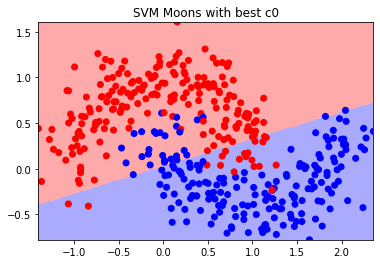

In [81]:
#Plot SVM moons with best c0 and degree=2
plot_decision_boundary(dist_poly2_moon, 'SVM Moons with best c0', Xtrain_moon, Xtest_moon, ytrain_moon)

In [97]:
#bad c0 for moons degree 2
coeff0_poly2_moon = param_range[np.argsort(test_scores_poly2_moon_mean)[-1]]
print("The bad coeff0: ", 0.0001)
dist_poly2_moon = SVC(kernel='poly', coef0 = 0.0001,degree=2)
dist_poly2_moon.fit(Xtrain_moon, ytrain_moon)
acc_train_poly2_moon = dist_poly2_moon.score(Xtrain_moon, ytrain_moon)
acc_test_poly2_moon = dist_poly2_moon.score(Xtest_moon, ytest_moon)
print('Training accuracy:', acc_train_poly2_moon)
print('Test accuracy:', acc_test_poly2_moon)

The bad coeff0:  0.0001
Training accuracy: 0.79
Test accuracy: 0.71


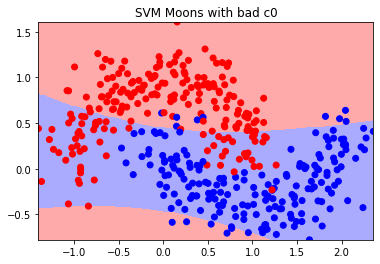

In [98]:
#Plot SVM moons with best c0 and degree=2
plot_decision_boundary(dist_poly2_moon, 'SVM Moons with bad c0', Xtrain_moon, Xtest_moon, ytrain_moon)

In [87]:
coeff0_poly3_moon = param_range[np.argsort(test_scores_poly3_moon_mean)[-1]]
print("The best coeff0: ", coeff0_poly3_moon)
dist_poly3_moon = SVC(kernel='poly', coef0 = coeff0_poly3_moon,degree=3)
dist_poly3_moon.fit(Xtrain_moon, ytrain_moon)
acc_train_poly3_moon = dist_poly3_moon.score(Xtrain_moon, ytrain_moon)
acc_test_poly3_moon = dist_poly3_moon.score(Xtest_moon, ytest_moon)
print('Training accuracy:', acc_train_poly3_moon)
print('Test accuracy:', acc_test_poly3_moon)

The best coeff0:  100.0
Training accuracy: 0.975
Test accuracy: 0.96


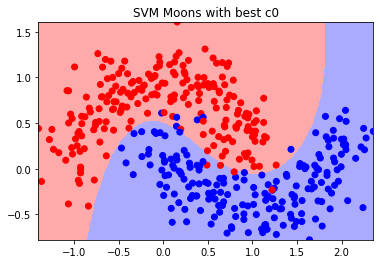

In [88]:
#Plot SVM moons with best c0 and degree=3
plot_decision_boundary(dist_poly3_moon, 'SVM Moons with best c0', Xtrain_moon, Xtest_moon, ytrain_moon)

In [107]:
coeff0_poly3_moon = param_range[np.argsort(test_scores_poly3_moon_mean)[-2]]
print("The second best coeff0: ", coeff0_poly3_moon)
dist_poly3_moon = SVC(kernel='poly', coef0 = coeff0_poly3_moon,degree=3)
dist_poly3_moon.fit(Xtrain_moon, ytrain_moon)
acc_train_poly3_moon = dist_poly3_moon.score(Xtrain_moon, ytrain_moon)
acc_test_poly3_moon = dist_poly3_moon.score(Xtest_moon, ytest_moon)
print('Training accuracy:', acc_train_poly3_moon)
print('Test accuracy:', acc_test_poly3_moon)

The second best coeff0:  1.0
Training accuracy: 0.975
Test accuracy: 0.94


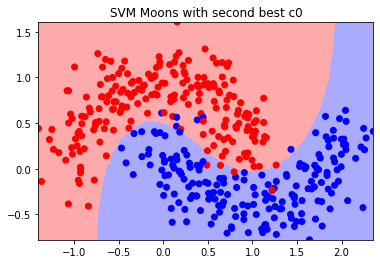

In [108]:
#Plot SVM moons with secondbest c0 and degree=3
plot_decision_boundary(dist_poly3_moon, 'SVM Moons with second best c0', Xtrain_moon, Xtest_moon, ytrain_moon)

In [109]:
print("The bad coeff0: ", 1000)
dist_poly3_moon = SVC(kernel='poly', coef0 = 1000,degree=3)
dist_poly3_moon.fit(Xtrain_moon, ytrain_moon)
acc_train_poly3_moon = dist_poly3_moon.score(Xtrain_moon, ytrain_moon)
acc_test_poly3_moon = dist_poly3_moon.score(Xtest_moon, ytest_moon)
print('Training accuracy:', acc_train_poly3_moon)
print('Test accuracy:', acc_test_poly3_moon)

The bad coeff0:  1000
Training accuracy: 0.895
Test accuracy: 0.87


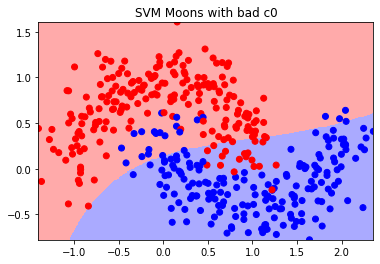

In [110]:
#Plot SVM moons with bad c0 and degree=3
plot_decision_boundary(dist_poly3_moon, 'SVM Moons with bad c0', Xtrain_moon, Xtest_moon, ytrain_moon)

In [111]:
coeff0_poly2_circle = param_range[np.argsort(test_scores_poly2_circle_mean)[-1]]
print("The best coeff0: ", coeff0_poly2_circle)
dist_poly2_circle = SVC(kernel='poly', coef0 = coeff0_poly2_circle, degree=2)
dist_poly2_circle.fit(Xtrain_circle, ytrain_circle)
acc_train_poly2_circle = dist_poly2_circle.score(Xtrain_circle, ytrain_circle)
acc_test_poly2_circle = dist_poly2_circle.score(Xtest_circle, ytest_circle)
print('Training accuracy:', acc_train_poly2_circle)
print('Test accuracy:', acc_test_poly2_circle)

The best coeff0:  0.01
Training accuracy: 0.685
Test accuracy: 0.78


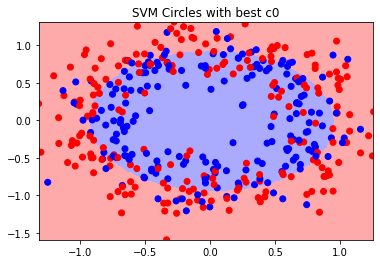

In [112]:
#Plot SVM circles with best c0 and degree=2
plot_decision_boundary(dist_poly2_circle, 'SVM Circles with best c0', Xtrain_circle, Xtest_circle, ytrain_circle)

In [118]:
coeff0_poly2_circle = param_range[np.argsort(test_scores_poly2_circle_mean)[-2]]
print("The second best coeff0: ", coeff0_poly2_circle)
dist_poly2_circle = SVC(kernel='poly', coef0 = coeff0_poly2_circle, degree=2)
dist_poly2_circle.fit(Xtrain_circle, ytrain_circle)
acc_train_poly2_circle = dist_poly2_circle.score(Xtrain_circle, ytrain_circle)
acc_test_poly2_circle = dist_poly2_circle.score(Xtest_circle, ytest_circle)
print('Training accuracy:', acc_train_poly2_circle)
print('Test accuracy:', acc_test_poly2_circle)

The second best coeff0:  100.0
Training accuracy: 0.6875
Test accuracy: 0.78


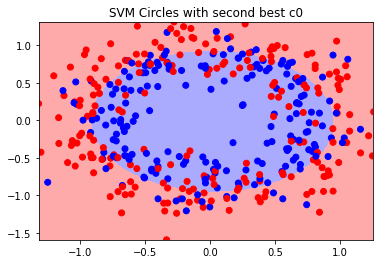

In [120]:
#Plot SVM circles with second best c0 and degree=2
plot_decision_boundary(dist_poly2_circle, 'SVM Circles with second best c0', Xtrain_circle, Xtest_circle, ytrain_circle)

In [122]:
print("The bad coeff0: ", 10000)
dist_poly2_circle = SVC(kernel='poly', coef0 = 10000, degree=2)
dist_poly2_circle.fit(Xtrain_circle, ytrain_circle)
acc_train_poly2_circle = dist_poly2_circle.score(Xtrain_circle, ytrain_circle)
acc_test_poly2_circle = dist_poly2_circle.score(Xtest_circle, ytest_circle)
print('Training accuracy:', acc_train_poly2_circle)
print('Test accuracy:', acc_test_poly2_circle)

The bad coeff0:  10000
Training accuracy: 0.6825
Test accuracy: 0.71


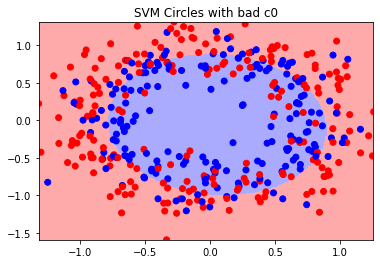

In [123]:
#Plot SVM circles with bad c0 and degree=2
plot_decision_boundary(dist_poly2_circle, 'SVM Circles with bad c0', Xtrain_circle, Xtest_circle, ytrain_circle)

In [124]:
coeff0_poly3_circle = param_range[np.argsort(test_scores_poly3_circle_mean)[-1]]
print("The second best coeff0: ", coeff0_poly3_circle)
dist_poly3_circle = SVC(kernel='poly', coef0 = coeff0_poly3_circle, degree=3)
dist_poly3_circle.fit(Xtrain_circle, ytrain_circle)
acc_train_poly3_circle = dist_poly3_circle.score(Xtrain_circle, ytrain_circle)
acc_test_poly3_circle = dist_poly3_circle.score(Xtest_circle, ytest_circle)
print('Training accuracy:', acc_train_poly3_circle)
print('Test accuracy:', acc_test_poly3_circle)

The second best coeff0:  1.0
Training accuracy: 0.69
Test accuracy: 0.77


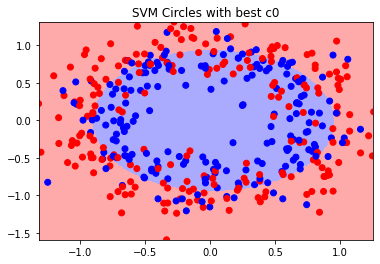

In [125]:
#Plot SVM circles with best c0 and degree=3
plot_decision_boundary(dist_poly3_circle, 'SVM Circles with best c0', Xtrain_circle, Xtest_circle, ytrain_circle)

In [114]:
coeff0_poly3_circle = param_range[np.argsort(test_scores_poly3_circle_mean)[-2]]
print("The second best coeff0: ", coeff0_poly3_circle)
dist_poly3_circle = SVC(kernel='poly', coef0 = coeff0_poly3_circle, degree=3)
dist_poly3_circle.fit(Xtrain_circle, ytrain_circle)
acc_train_poly3_circle = dist_poly3_circle.score(Xtrain_circle, ytrain_circle)
acc_test_poly3_circle = dist_poly3_circle.score(Xtest_circle, ytest_circle)
print('Training accuracy:', acc_train_poly3_circle)
print('Test accuracy:', acc_test_poly3_circle)

The second best coeff0:  100.0
Training accuracy: 0.695
Test accuracy: 0.77


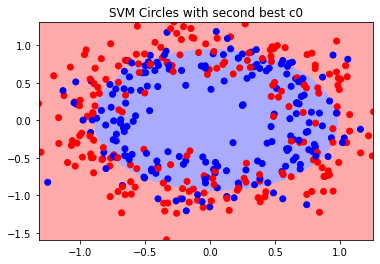

In [115]:
#Plot SVM circles with second best c0 and degree=3
plot_decision_boundary(dist_poly3_circle, 'SVM Circles with second best c0', Xtrain_circle, Xtest_circle, ytrain_circle)

In [116]:
print("The bad coeff0: ", 10000)
dist_poly3_circle = SVC(kernel='poly', coef0 = 10000, degree=3)
dist_poly3_circle.fit(Xtrain_circle, ytrain_circle)
acc_train_poly3_circle = dist_poly3_circle.score(Xtrain_circle, ytrain_circle)
acc_test_poly3_circle = dist_poly3_circle.score(Xtest_circle, ytest_circle)
print('Training accuracy:', acc_train_poly3_circle)
print('Test accuracy:', acc_test_poly3_circle)

The bad coeff0:  10000
Training accuracy: 0.625
Test accuracy: 0.66


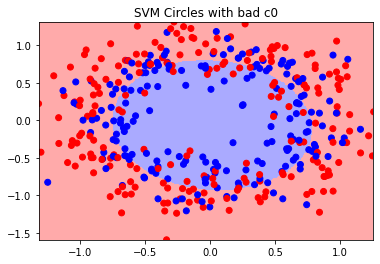

In [117]:
#Plot SVM circles with best c0 and degree=3
plot_decision_boundary(dist_poly3_circle, 'SVM Circles with bad c0', Xtrain_circle, Xtest_circle, ytrain_circle)

## Part E: Nearest Neighbor weight=uniform
5-fold cross-validation and validation curves to find the 2 best performing values of k

In [126]:
#moon train KNN
knn_moon_train_unif = KNeighborsClassifier(weights='uniform').fit(Xtrain_moon, ytrain_moon)

#circle train KNN
knn_circle_train_unif = KNeighborsClassifier(weights='uniform').fit(Xtrain_circle, ytrain_circle)

param range: range(1, 30)
test scores mean: [0.9475 0.9475 0.96   0.9625 0.97   0.9675 0.9725 0.97   0.9725 0.9725
 0.97   0.9725 0.9725 0.97   0.9675 0.965  0.97   0.965  0.965  0.9675
 0.97   0.97   0.9675 0.9625 0.9675 0.97   0.965  0.97   0.965 ]


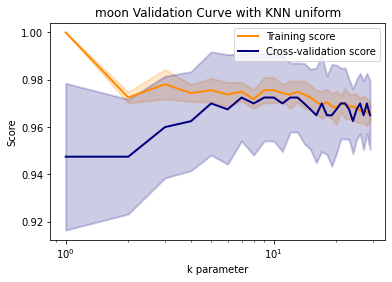

In [156]:
# select from the range
param_range = range(1,30)

print("param range:", param_range)

train_scores_knn_unif_moon, test_scores_knn_unif_moon = validation_curve(knn_moon_train_unif,Xtrain_moon, ytrain_moon, param_name="n_neighbors", param_range=param_range,
    scoring="accuracy", n_jobs=1, cv = 5)
train_scores_knn_unif_moon_mean = np.mean(train_scores_knn_unif_moon, axis=1)
train_scores_knn_unif_moon_std = np.std(train_scores_knn_unif_moon, axis=1)
test_scores_knn_unif_moon_mean = np.mean(test_scores_knn_unif_moon, axis=1)
test_scores_knn_unif_moon_std = np.std(test_scores_knn_unif_moon, axis=1)

print("test scores mean:", test_scores_knn_unif_moon_mean)

# Plot CV error as a function of k
plt.title("moon Validation Curve with KNN uniform")
plt.xlabel("k parameter")
plt.ylabel("Score")
lw = 2
plt.semilogx(param_range, train_scores_knn_unif_moon_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_knn_unif_moon_mean - train_scores_knn_unif_moon_std,
                 train_scores_knn_unif_moon_mean + train_scores_knn_unif_moon_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_knn_unif_moon_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_knn_unif_moon_mean - test_scores_knn_unif_moon_std,
                 test_scores_knn_unif_moon_mean + test_scores_knn_unif_moon_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

param range: range(1, 30)
test scores mean: [0.595  0.575  0.605  0.595  0.6125 0.61   0.625  0.64   0.6125 0.6375
 0.6325 0.6375 0.65   0.6475 0.65   0.645  0.6425 0.665  0.6525 0.6675
 0.675  0.6725 0.67   0.6425 0.65   0.6425 0.6425 0.6475 0.6425]


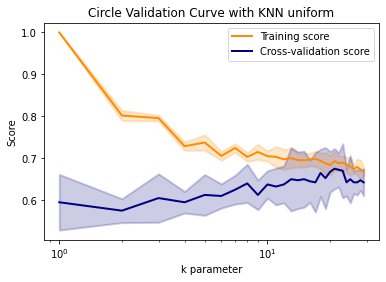

In [164]:
# select from the range
param_range = range(1,30)

print("param range:", param_range)

train_scores_knn_unif_circle, test_scores_knn_unif_circle = validation_curve(knn_circle_train_unif,Xtrain_circle, ytrain_circle, param_name="n_neighbors", param_range=param_range,
    scoring="accuracy", n_jobs=1, cv = 5)
train_scores_knn_unif_circle_mean = np.mean(train_scores_knn_unif_circle, axis=1)
train_scores_knn_unif_circle_std = np.std(train_scores_knn_unif_circle, axis=1)
test_scores_knn_unif_circle_mean = np.mean(test_scores_knn_unif_circle, axis=1)
test_scores_knn_unif_circle_std = np.std(test_scores_knn_unif_circle, axis=1)

print("test scores mean:", test_scores_knn_unif_circle_mean)

# Plot CV error as a function of gamma
plt.title("Circle Validation Curve with KNN uniform")
plt.xlabel("k parameter")
plt.ylabel("Score")
lw = 2
plt.semilogx(param_range, train_scores_knn_unif_circle_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_knn_unif_circle_mean - train_scores_knn_unif_circle_std,
                 train_scores_knn_unif_circle_mean + train_scores_knn_unif_circle_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_knn_unif_circle_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_knn_unif_circle_mean - test_scores_knn_unif_circle_std,
                 test_scores_knn_unif_circle_mean + test_scores_knn_unif_circle_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

In [165]:
k_knn_unif_circle = param_range[np.argsort(test_scores_knn_unif_circle_mean)[-1]]
print("The best K for circle: ", k_knn_unif_circle)
dist_knn_unif_circle = KNeighborsClassifier(weights='uniform', n_neighbors=k_knn_unif_circle)
dist_knn_unif_circle.fit(Xtrain_circle, ytrain_circle)
acc_train_knn_unif_circle = dist_knn_unif_circle.score(Xtrain_circle, ytrain_circle)
acc_test_knn_unif_circle = dist_knn_unif_circle.score(Xtest_circle, ytest_circle)
print('Training accuracy:', acc_train_knn_unif_circle)
print('Test accuracy:', acc_test_knn_unif_circle)

The best K for circle:  21
Training accuracy: 0.6875
Test accuracy: 0.69


In [166]:
k_knn_unif_circle2 = param_range[np.argsort(test_scores_knn_unif_circle_mean)[-2]]
print("The second best K for circle: ", k_knn_unif_circle2)
dist_knn_unif_circle2 = KNeighborsClassifier(weights='uniform', n_neighbors=k_knn_unif_circle2)
dist_knn_unif_circle2.fit(Xtrain_circle, ytrain_circle)
acc_train_knn_unif_circle2 = dist_knn_unif_circle2.score(Xtrain_circle, ytrain_circle)
acc_test_knn_unif_circle2 = dist_knn_unif_circle2.score(Xtest_circle, ytest_circle)
print('Training accuracy:', acc_train_knn_unif_circle2)
print('Test accuracy:', acc_test_knn_unif_circle2)

The second best K for circle:  22
Training accuracy: 0.7
Test accuracy: 0.68


In [167]:
k_knn_unif_moon = param_range[np.argsort(test_scores_knn_unif_moon_mean)[-1]]
print("The best K for moon: ", k_knn_unif_moon)
dist_knn_unif_moon = KNeighborsClassifier(weights='uniform', n_neighbors=k_knn_unif_moon)
dist_knn_unif_moon.fit(Xtrain_moon, ytrain_moon)
acc_train_knn_unif_moon = dist_knn_unif_moon.score(Xtrain_moon, ytrain_moon)
acc_test_knn_unif_moon = dist_knn_unif_moon.score(Xtest_moon, ytest_moon)
print('Training accuracy:', acc_train_knn_unif_moon)
print('Test accuracy:', acc_test_knn_unif_moon)

The best K for moon:  12
Training accuracy: 0.975
Test accuracy: 0.97


In [171]:
k_knn_unif_moon2 = param_range[np.argsort(test_scores_knn_unif_moon_mean)[-2]]
print("The second best K for moon: ", k_knn_unif_moon)
dist_knn_unif_moon2 = KNeighborsClassifier(weights='uniform', n_neighbors=k_knn_unif_moon2)
dist_knn_unif_moon2.fit(Xtrain_moon, ytrain_moon)
acc_train_knn_unif_moon2 = dist_knn_unif_moon2.score(Xtrain_moon, ytrain_moon)
acc_test_knn_unif_moon2 = dist_knn_unif_moon2.score(Xtest_moon, ytest_moon)
print('Training accuracy:', acc_train_knn_unif_moon2)
print('Test accuracy:', acc_test_knn_unif_moon2)

The second best K for moon:  12
Training accuracy: 0.975
Test accuracy: 0.96


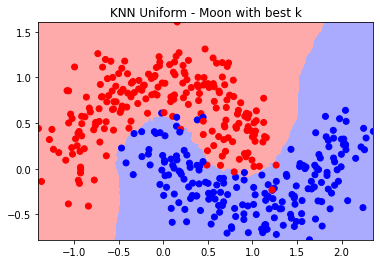

In [133]:
plot_decision_boundary(dist_knn_unif_moon, 'KNN Uniform - Moon with best k', Xtrain_moon, Xtest_moon, ytrain_moon)

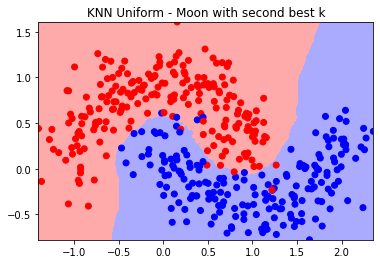

In [134]:
plot_decision_boundary(dist_knn_unif_moon2, 'KNN Uniform - Moon with second best k', Xtrain_moon, Xtest_moon, ytrain_moon)

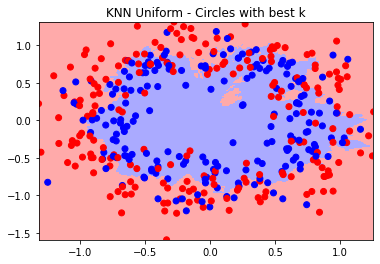

In [135]:
plot_decision_boundary(dist_knn_unif_circle, 'KNN Uniform - Circles with best k', Xtrain_circle, Xtest_circle, ytrain_circle)

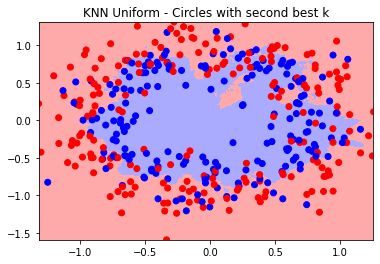

In [136]:
plot_decision_boundary(dist_knn_unif_circle2, 'KNN Uniform - Circles with second best k', Xtrain_circle, Xtest_circle, ytrain_circle)

Result interpretation: 
Moons dataset:
KNN using weight as uniform gave us very high training and test accuracy of around 97% with the best k value as 12. Because the boundaries are not smooth there is a high chance of overfitting with these models.
Circle dataset:
The circle dataset is very overfitted and the accuracy is not very high at around 70%. The best value for K is 21 and second best is 22.

## Part F: Nearest Neightbor weight=distance
5-fold cross-validation and validation curves to find the 2 best performing values of k

In [137]:
#moon train KNN
knn_moon_train_dist = KNeighborsClassifier(weights='distance').fit(Xtrain_moon, ytrain_moon)

#circle train KNN
knn_circle_train_dist = KNeighborsClassifier(weights='distance').fit(Xtrain_circle, ytrain_circle)

param range: range(1, 30)
test scores mean: [0.9475 0.9475 0.95   0.9575 0.9575 0.955  0.9625 0.9625 0.9625 0.9675
 0.9625 0.9675 0.9625 0.9675 0.9675 0.9675 0.97   0.97   0.97   0.97
 0.97   0.97   0.97   0.97   0.97   0.97   0.97   0.97   0.97  ]


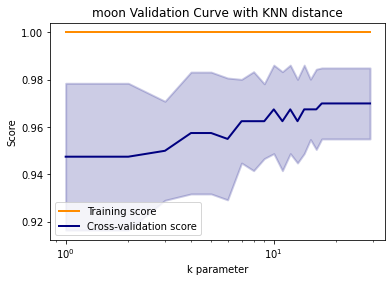

In [158]:
# select from the range
param_range = range(1,30)

print("param range:", param_range)

train_scores_knn_dist_moon, test_scores_knn_dist_moon = validation_curve(knn_moon_train_dist,Xtrain_moon, ytrain_moon, param_name="n_neighbors", param_range=param_range,
    scoring="accuracy", n_jobs=1, cv = 5)
train_scores_knn_dist_moon_mean = np.mean(train_scores_knn_dist_moon, axis=1)
train_scores_knn_dist_moon_std = np.std(train_scores_knn_dist_moon, axis=1)
test_scores_knn_dist_moon_mean = np.mean(test_scores_knn_dist_moon, axis=1)
test_scores_knn_dist_moon_std = np.std(test_scores_knn_dist_moon, axis=1)

print("test scores mean:", test_scores_knn_dist_moon_mean)

# Plot CV error as a function of k
plt.title("moon Validation Curve with KNN distance")
plt.xlabel("k parameter")
plt.ylabel("Score")
lw = 2
plt.semilogx(param_range, train_scores_knn_dist_moon_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_knn_dist_moon_mean - train_scores_knn_dist_moon_std,
                 train_scores_knn_dist_moon_mean + train_scores_knn_dist_moon_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_knn_dist_moon_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_knn_dist_moon_mean - test_scores_knn_dist_moon_std,
                 test_scores_knn_dist_moon_mean + test_scores_knn_dist_moon_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

param range: range(1, 30)
test scores mean: [0.595  0.595  0.605  0.6075 0.6    0.6025 0.5975 0.615  0.6225 0.6275
 0.6225 0.6425 0.6275 0.645  0.6325 0.6375 0.62   0.6425 0.63   0.6475
 0.645  0.655  0.6425 0.6425 0.6425 0.645  0.6375 0.65   0.64  ]


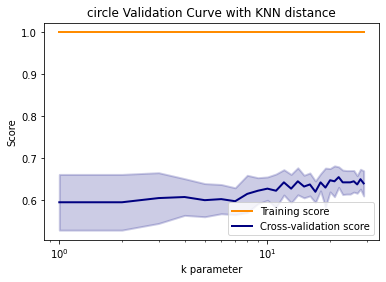

In [160]:
# select from the range
param_range = range(1,30)

print("param range:", param_range)

train_scores_knn_dist_circle, test_scores_knn_dist_circle = validation_curve(knn_circle_train_dist,Xtrain_circle, ytrain_circle, param_name="n_neighbors", param_range=param_range,
    scoring="accuracy", n_jobs=1, cv = 5)
train_scores_knn_dist_circle_mean = np.mean(train_scores_knn_dist_circle, axis=1)
train_scores_knn_dist_circle_std = np.std(train_scores_knn_dist_circle, axis=1)
test_scores_knn_dist_circle_mean = np.mean(test_scores_knn_dist_circle, axis=1)
test_scores_knn_dist_circle_std = np.std(test_scores_knn_dist_circle, axis=1)

print("test scores mean:", test_scores_knn_dist_circle_mean)

# Plot CV error as a function of k
plt.title("circle Validation Curve with KNN distance")
plt.xlabel("k parameter")
plt.ylabel("Score")
lw = 2
plt.semilogx(param_range, train_scores_knn_dist_circle_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_knn_dist_circle_mean - train_scores_knn_dist_circle_std,
                 train_scores_knn_dist_circle_mean + train_scores_knn_dist_circle_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_knn_dist_circle_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_knn_dist_circle_mean - test_scores_knn_dist_circle_std,
                 test_scores_knn_dist_circle_mean + test_scores_knn_dist_circle_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

In [140]:
k_knn_dist_moon = param_range[np.argsort(test_scores_knn_dist_moon_mean)[-1]]
print("The best K for moon: ", k_knn_dist_moon)
dist_knn_dist_moon = KNeighborsClassifier(weights='distance', n_neighbors=k_knn_dist_moon)
dist_knn_dist_moon.fit(Xtrain_moon, ytrain_moon)
acc_train_knn_dist_moon = dist_knn_dist_moon.score(Xtrain_moon, ytrain_moon)
acc_test_knn_dist_moon = dist_knn_dist_moon.score(Xtest_moon, ytest_moon)
print('Training accuracy:', acc_train_knn_dist_moon)
print('Test accuracy:', acc_test_knn_dist_moon)

The best K for moon:  29
Training accuracy: 1.0
Test accuracy: 0.97


In [141]:
k_knn_dist_moon2 = param_range[np.argsort(test_scores_knn_dist_moon_mean)[-2]]
print("The secondbest K for moon: ", k_knn_dist_moon2)
dist_knn_dist_moon2 = KNeighborsClassifier(weights='distance', n_neighbors=k_knn_dist_moon2)
dist_knn_dist_moon2.fit(Xtrain_moon, ytrain_moon)
acc_train_knn_dist_moon2 = dist_knn_dist_moon2.score(Xtrain_moon, ytrain_moon)
acc_test_knn_dist_moon2 = dist_knn_dist_moon2.score(Xtest_moon, ytest_moon)
print('Training accuracy:', acc_train_knn_dist_moon2)
print('Test accuracy:', acc_test_knn_dist_moon2)

The secondbest K for moon:  27
Training accuracy: 1.0
Test accuracy: 0.97


In [142]:
k_knn_dist_circle = param_range[np.argsort(test_scores_knn_dist_circle_mean)[-1]]
print("The best K for circle: ", k_knn_dist_circle)
dist_knn_dist_circle = KNeighborsClassifier(weights='distance', n_neighbors=k_knn_dist_circle)
dist_knn_dist_circle.fit(Xtrain_circle, ytrain_circle)
acc_train_knn_dist_circle = dist_knn_dist_circle.score(Xtrain_circle, ytrain_circle)
acc_test_knn_dist_circle = dist_knn_dist_circle.score(Xtest_circle, ytest_circle)
print('Training accuracy:', acc_train_knn_dist_circle)
print('Test accuracy:', acc_test_knn_dist_circle)

The best K for circle:  22
Training accuracy: 1.0
Test accuracy: 0.72


In [143]:
k_knn_dist_circle2 = param_range[np.argsort(test_scores_knn_dist_circle_mean)[-2]]
print("The second best K for circle: ", k_knn_dist_circle2)
dist_knn_dist_circle2 = KNeighborsClassifier(weights='distance', n_neighbors=k_knn_dist_circle2)
dist_knn_dist_circle2.fit(Xtrain_circle, ytrain_circle)
acc_train_knn_dist_circle2 = dist_knn_dist_circle2.score(Xtrain_circle, ytrain_circle)
acc_test_knn_dist_circle2 = dist_knn_dist_circle2.score(Xtest_circle, ytest_circle)
print('Training accuracy:', acc_train_knn_dist_circle2)
print('Test accuracy:', acc_test_knn_dist_circle2)

The second best K for circle:  28
Training accuracy: 1.0
Test accuracy: 0.72


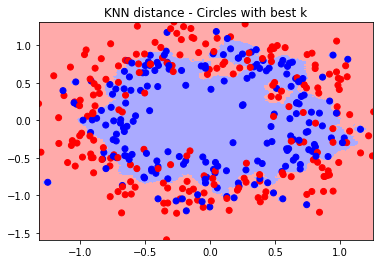

In [146]:
plot_decision_boundary(dist_knn_dist_circle, 'KNN distance - Circles with best k', Xtrain_circle, Xtest_circle, ytrain_circle)

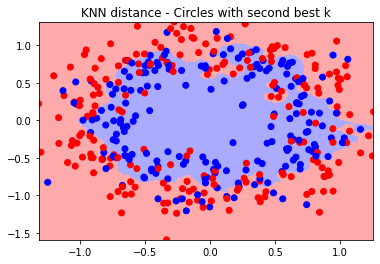

In [147]:
plot_decision_boundary(dist_knn_dist_circle2, 'KNN distance - Circles with second best k', Xtrain_circle, Xtest_circle, ytrain_circle)

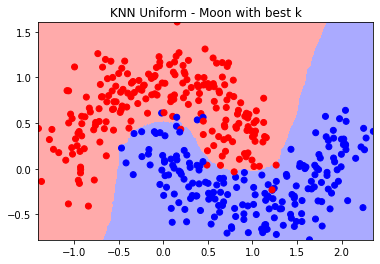

In [148]:
plot_decision_boundary(dist_knn_dist_moon, 'KNN Uniform - Moon with best k', Xtrain_moon, Xtest_moon, ytrain_moon)

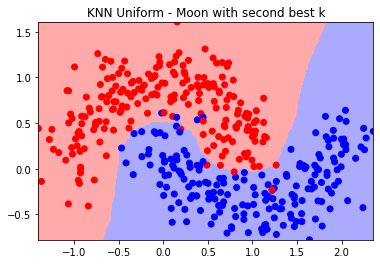

In [149]:
plot_decision_boundary(dist_knn_dist_moon2, 'KNN Uniform - Moon with second best k', Xtrain_moon, Xtest_moon, ytrain_moon)

Result interpretation: 
Moons dataset:
In comparison to the uniform weights, these models with weights = distance performed slightly better. It is important to note that the training data is 100% accuracy on all the tests. This makes sense because KNN distance is looking for the closest point and that is the same point since the data it trained on is the same. The test data accuracy is also very high around 97%. It does seem to be overfitted looking at the heatmap. Best k values are 29 and 27.
Circle dataset:
The circle data shows similar characteristics. 100% on all the training accuracy. Test accuracy is in the ~70% with best k value being 22 and 28.

## Part G: Choose Best Performing Model using Test Data

In [150]:
from itertools import cycle

from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score

In [151]:
# Set the probability = True to calculate the ROC curve
classifier = OneVsRestClassifier(dist_poly3_moon)
y_score_moon = classifier.fit(Xtrain_moon, ytrain_moon).decision_function(Xtest_moon)

# Set the probability = True to calculate the ROC curve
classifier2 = OneVsRestClassifier(dist_poly2_circle)
y_score_circle = classifier2.fit(Xtrain_circle, ytrain_circle).decision_function(Xtest_circle)

In [152]:
# Compute ROC curve and ROC area for each class

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(1):
    fpr[i], tpr[i], _ = roc_curve(ytest_moon[:,], y_score_moon[:,])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(ytest_moon.ravel(), y_score_moon.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

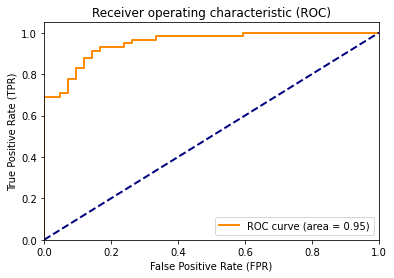

In [153]:
lw = 2
classnum = 0
plt.plot(fpr[classnum], tpr[classnum], color='darkorange',
         lw = lw, label = 'ROC curve (area = %0.2f)' % roc_auc[classnum])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver operating characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

In [154]:
# Compute ROC curve and ROC area for each class

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(1):
    fpr[i], tpr[i], _ = roc_curve(ytest_circle[:,], y_score_circle[:,])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(ytest_circle.ravel(), y_score_circle.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

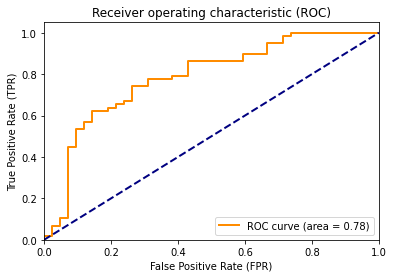

In [155]:
lw = 2
classnum = 0
plt.plot(fpr[classnum], tpr[classnum], color='darkorange',
         lw = lw, label = 'ROC curve (area = %0.2f)' % roc_auc[classnum])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver operating characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()